<a href="https://colab.research.google.com/github/Drishti-17/sentence_similarity_using_topsis/blob/main/Text_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# TEXT SENTENCE SIMILARITY USING TOPSIS
---




**Text sentence similarity** refers to the degree of semantic closeness between two sentences. It aims to evaluate how similar in meaning two sentences are, regardless of their exact wording. This involves understanding the overall message, context, and sentiment of each sentence rather than simply focusing on shared words or phrases.

Here are some key aspects of text sentence similarity:



1. **Semantic Understanding**: It goes beyond literal word matching and attempts to capture the deeper meaning and intent of the sentences.
2. **Context Dependence:** Similar meaning can be expressed in different ways depending on the context, and accurate evaluation requires considering this context.
3. **Applications:** Used in various NLP tasks like information retrieval, chatbots, text summarization, document clustering, and plagiarism detection.


Methods for Measuring Text Sentence Similarity:

1. **Word-Based Methods:** Calculate similarities based on shared words using metrics like Jaccard similarity or lexical overlap.
2. **Word Embedding-Based Methods:** Map words to numerical vectors capturing semantic meaning, then compute similarity between vectors using cosine similarity or other methods. Pre-trained models like Sentence Transformers offer powerful word embeddings.
3. **Deep Learning Models:** Utilize neural networks trained on large text datasets to directly evaluate semantic similarity between sentences.



In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 2.7 MB/s eta 0:00:00


#TOPSIS:
TOPSIS (Technique for Order of Preference by Similarity to Ideal Solution) is a multi-criteria decision analysis (MCDA) method that ranks a set of alternatives based on their similarities to an ideal solution and distances from a negative ideal solution.

Here's a breakdown of its technical aspects:

1. **Problem Formulation:**

* Alternatives: A set of options to be evaluated (e.g., pre-trained text similarity models).
*Criteria: A set of quantitative or qualitative factors used to assess the alternatives (e.g., accuracy, speed, resource efficiency).
*Decision Matrix: A matrix M with m rows (alternatives) and n columns (criteria), where M_ij represents the performance of alternative i on criterion j.


2. **Normalization:**- Normalize the decision matrix M using methods like min-max normalization or z-score normalization to ensure all criteria have comparable scales. This creates a normalized decision matrix N.


3. **Weighted Normalized Decision Matrix:**- Assign weights w_j to each criterion based on its importance (e.g., w_j = 0.6 for accuracy, w_j = 0.2 for speed).
Calculate the weighted normalized decision matrix V by multiplying each element of N by its corresponding weight: V_ij = w_j * N_ij.
4. **Ideal and Negative Ideal Solutions:**- Define the ideal solution (PIS) as a vector with the best possible value for each criterion: PIS_j = max_i {V_ij} for all j.
Define the negative ideal solution (NIS) as a vector with the worst possible value for each criterion: NIS_j = min_i {V_ij} for all j.
5. **Distances from Ideal and Negative Ideal Solutions:**-
 Calculate the distance of each alternative i from the ideal solution using a distance metric like Euclidean distance: D_i+ = sqrt(sum_j((V_ij - PIS_j)^2)).
Calculate the distance of each alternative i from the negative ideal solution: D_i- = sqrt(sum_j((V_ij - NIS_j)^2)).
6. **TOPSIS Score:**- Calculate the similarity to ideal solution (TOPSIS score) for each alternative i: S_i = D_i- / (D_i- + D_i+).
Higher S_i values indicate greater similarity to the ideal solution and, therefore, a more preferable alternative.



Importing necessary libraries

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Sample sentences for similarity comparison

In [ ]:
sentences = ["BERT is a pre-trained model for NLP tasks.",
             "GPT-3 is a powerful language model by OpenAI.",
             "USE (Universal Sentence Encoder) is developed by Google.",
             "XLNet is a transformer model for various NLP tasks."]

Load pre-trained models

In [ ]:
model_1 = SentenceTransformer('all-mpnet-base-v2')
model_2 = SentenceTransformer('all-MiniLM-L6-v2')
model_3= SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
reference_sentence = "This is a reference sentence."

Pre Trained MODEL 1 (all-mpnet-base-v2')

Similarity Matrix:
                                                    BERT is a pre-trained model for NLP tasks.  \
BERT is a pre-trained model for NLP tasks.                                            1.000000   
GPT-3 is a powerful language model by OpenAI.                                         0.527044   
USE (Universal Sentence Encoder) is developed b...                                    0.534052   
XLNet is a transformer model for various NLP ta...                                    0.622290   

                                                    GPT-3 is a powerful language model by OpenAI.  \
BERT is a pre-trained model for NLP tasks.                                               0.527044   
GPT-3 is a powerful language model by OpenAI.                                            1.000000   
USE (Universal Sentence Encoder) is developed b...                                       0.505083   
XLNet is a transformer model for various NLP ta...                                    

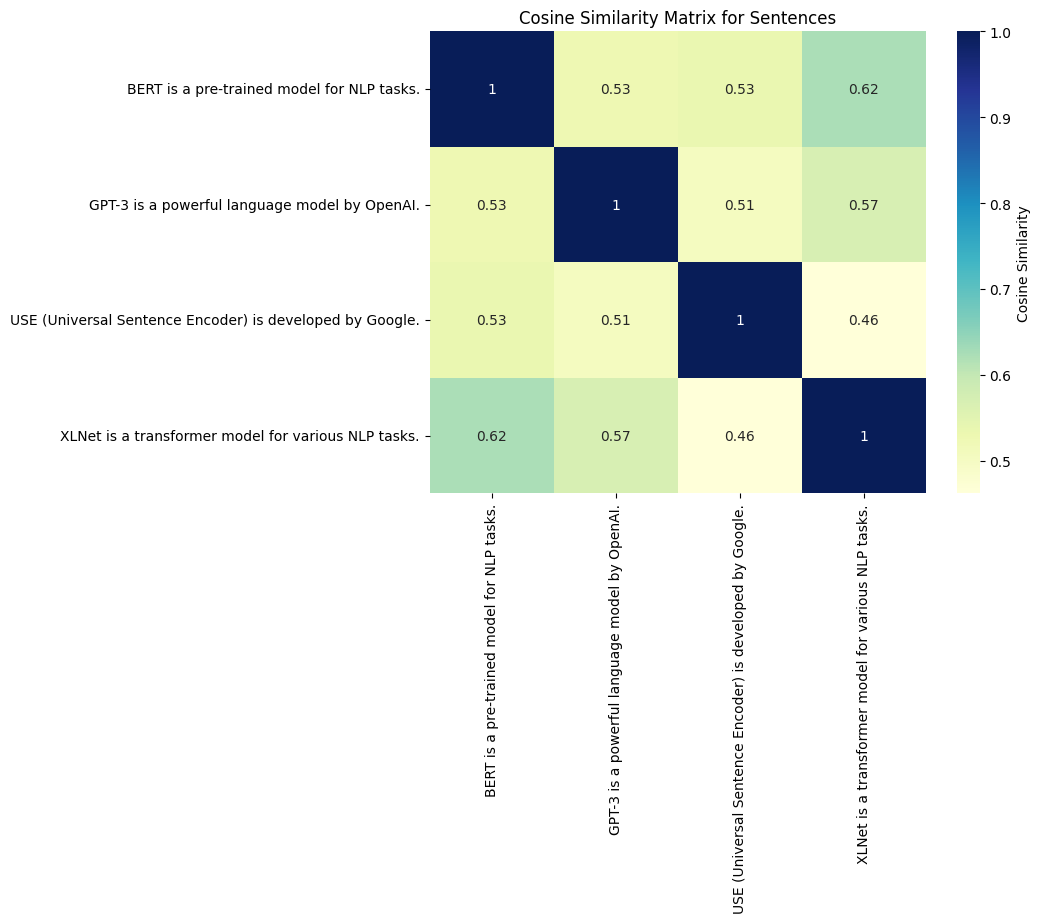

Model Ranking:
   Model  TOPSIS Score  Rank
2    USE      1.000000   1.0
3  XLNet      0.479627   2.0
0   BERT      0.434896   3.0
1  GPT-3      0.144200   4.0
Results:
   Model  Cosine Similarity  Additional Criterion  TOPSIS Score  Rank
0   BERT           0.202102              4.375000      0.434896   3.0
1  GPT-3           0.133359              4.750000      0.144200   4.0
2    USE           0.220721              6.125000      1.000000   1.0
3  XLNet           0.196201              4.777778      0.479627   2.0


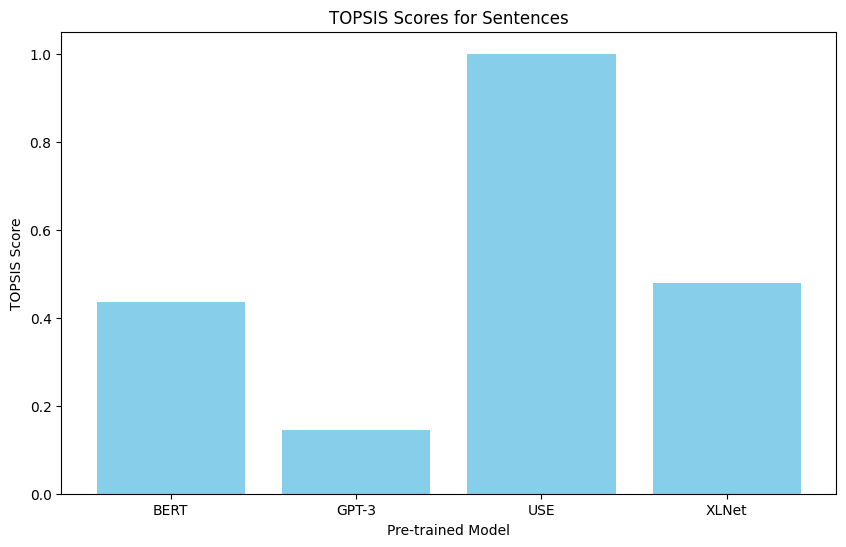


Scores Table:
+-------+-------------------+----------------------+--------------+
| Model | Cosine Similarity | Additional Criterion | TOPSIS Score |
+-------+-------------------+----------------------+--------------+
|  BERT |       0.2021      |        4.3750        |    0.4349    |
| GPT-3 |       0.1334      |        4.7500        |    0.1442    |
|  USE  |       0.2207      |        6.1250        |    1.0000    |
| XLNet |       0.1962      |        4.7778        |    0.4796    |
+-------+-------------------+----------------------+--------------+


In [ ]:
# Get sentence embeddings
sentence_embeddings = model_1.encode(sentences, convert_to_tensor=True)

# Calculate cosine similarity for each pair of sentences
similarity_matrix = util.pytorch_cos_sim(sentence_embeddings, sentence_embeddings).numpy()

# Create a DataFrame for the similarity matrix
df_similarity_matrix = pd.DataFrame(similarity_matrix, columns=sentences, index=sentences)

# Display the similarity matrix table
print("Similarity Matrix:")
print(df_similarity_matrix)

# Draw a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(df_similarity_matrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Cosine Similarity'})
plt.title('Cosine Similarity Matrix for Sentences')
plt.show()

# Get sentence embeddings
reference_embedding = model_1.encode([reference_sentence], convert_to_tensor=True)

# Calculate cosine similarity for each sentence with the reference sentence
cosine_similarity_scores = [util.pytorch_cos_sim(reference_embedding, sentence_embedding)[0][0].item() for sentence_embedding in sentence_embeddings]

#Additional criterion (length of sentences)
additional_criterion_scores = [np.mean([len(word) for word in sentence.split()]) for sentence in sentences]


# Create a DataFrame with the scores
data = {'Model': ['BERT', 'GPT-3', 'USE', 'XLNet'],
        'Cosine Similarity': cosine_similarity_scores,
        'Additional Criterion': additional_criterion_scores}

df_scores = pd.DataFrame(data)

# Normalize the scores using Min-Max scaling
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(df_scores.iloc[:, 1:])

# Define weights for each criterion
weights = [0.5, 0.5]  # Adjust weights based on importance

# Calculate weighted normalized scores for each criterion
weighted_normalized_scores = normalized_scores * weights

# Calculate positive and negative ideal solutions
positive_ideal_solution = weighted_normalized_scores.max()
negative_ideal_solution = weighted_normalized_scores.min()

# Calculate the separation measures
positive_distance = ((weighted_normalized_scores - positive_ideal_solution) ** 2).sum(axis=1) ** 0.5
negative_distance = ((weighted_normalized_scores - negative_ideal_solution) ** 2).sum(axis=1) ** 0.5

# Calculate the performance score (TOPSIS Score)
performance_score = negative_distance / (negative_distance + positive_distance)

# Add performance score to the DataFrame
df_scores['TOPSIS Score'] = performance_score

df_scores['Rank'] = df_scores['TOPSIS Score'].rank(ascending=False)

# Print the results
print("Model Ranking:")
print(df_scores[['Model', 'TOPSIS Score', 'Rank']].sort_values(by='Rank'))

# Display the results
print("Results:")
print(df_scores)

# Draw a bar chart to visualize the TOPSIS scores
plt.figure(figsize=(10, 6))
plt.bar(df_scores['Model'], df_scores['TOPSIS Score'], color='skyblue')
plt.xlabel('Pre-trained Model')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Scores for Sentences')
plt.show()

# Create a table for better visualization
table_scores_1= PrettyTable()
table_scores_1.field_names = ['Model', 'Cosine Similarity', 'Additional Criterion', 'TOPSIS Score']
for i, row in df_scores.iterrows():
    table_scores_1.add_row([row['Model'], f"{row['Cosine Similarity']:.4f}", f"{row['Additional Criterion']:.4f}", f"{row['TOPSIS Score']:.4f}"])

print("\nScores Table:")
print(table_scores_1)


Pre Trained MODEL 2 ('all-MiniLM-L6-v2')

Similarity Matrix:
                                                    BERT is a pre-trained model for NLP tasks.  \
BERT is a pre-trained model for NLP tasks.                                            1.000000   
GPT-3 is a powerful language model by OpenAI.                                         0.358478   
USE (Universal Sentence Encoder) is developed b...                                    0.503270   
XLNet is a transformer model for various NLP ta...                                    0.554407   

                                                    GPT-3 is a powerful language model by OpenAI.  \
BERT is a pre-trained model for NLP tasks.                                               0.358478   
GPT-3 is a powerful language model by OpenAI.                                            1.000000   
USE (Universal Sentence Encoder) is developed b...                                       0.432980   
XLNet is a transformer model for various NLP ta...                                    

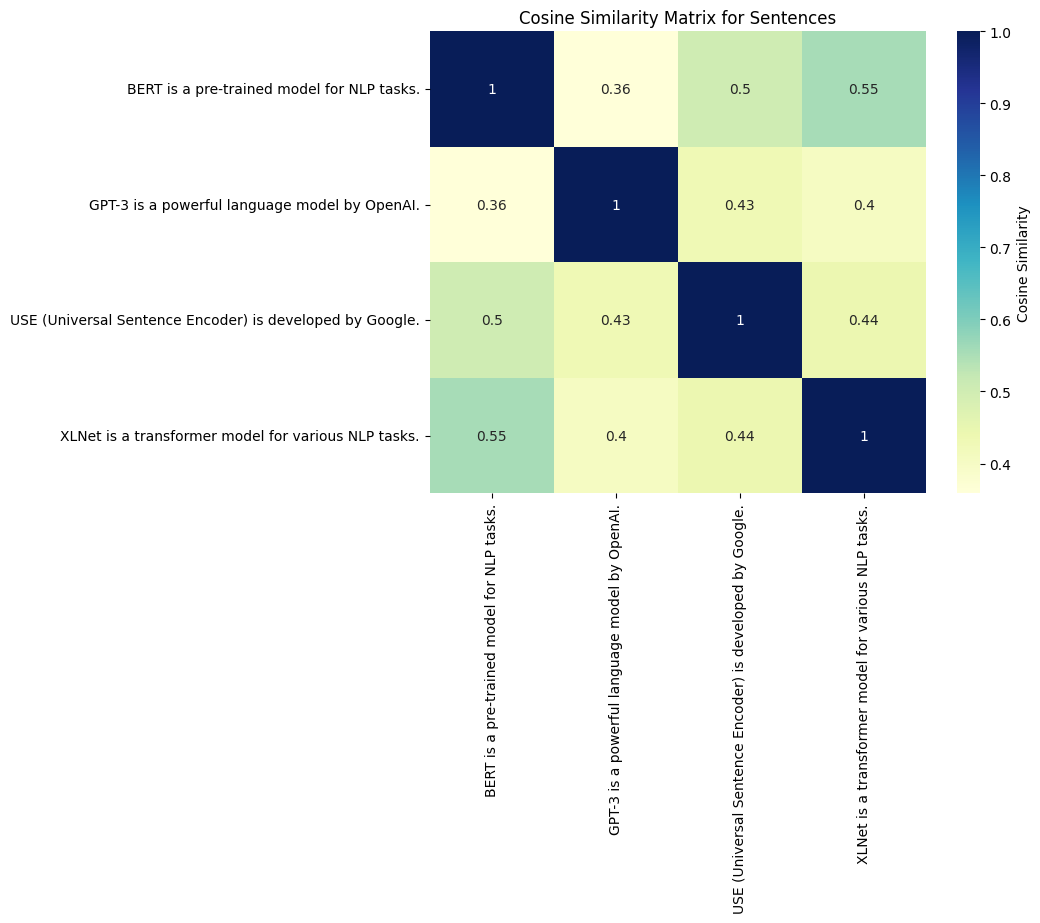

Model Ranking:
   Model  TOPSIS Score  Rank
2    USE       1.00000   1.0
0   BERT       0.47670   2.0
3  XLNet       0.27079   3.0
1  GPT-3       0.14420   4.0
Results:
   Model  Cosine Similarity  Additional Criterion  TOPSIS Score  Rank
0   BERT           0.219009              4.375000       0.47670   2.0
1  GPT-3           0.085684              4.750000       0.14420   4.0
2    USE           0.231507              6.125000       1.00000   1.0
3  XLNet           0.130584              4.777778       0.27079   3.0


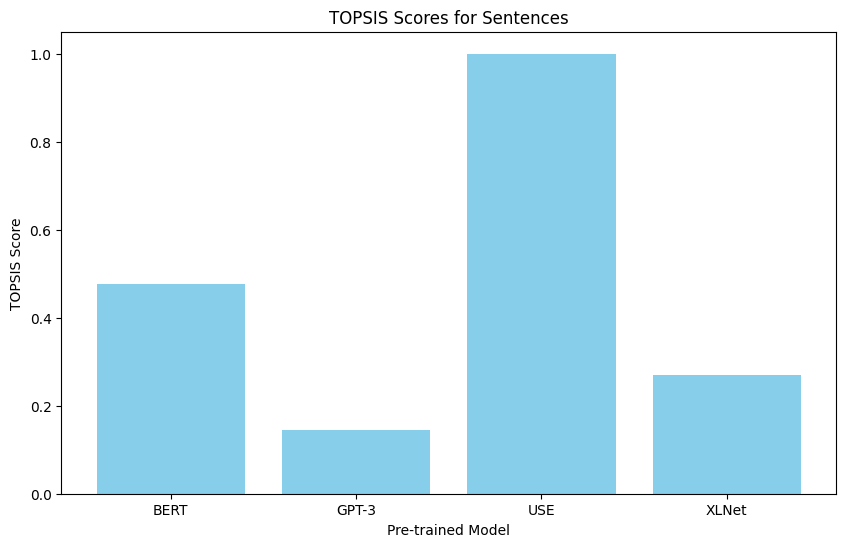


Scores Table:
+-------+-------------------+----------------------+--------------+
| Model | Cosine Similarity | Additional Criterion | TOPSIS Score |
+-------+-------------------+----------------------+--------------+
|  BERT |       0.2190      |        4.3750        |    0.4767    |
| GPT-3 |       0.0857      |        4.7500        |    0.1442    |
|  USE  |       0.2315      |        6.1250        |    1.0000    |
| XLNet |       0.1306      |        4.7778        |    0.2708    |
+-------+-------------------+----------------------+--------------+


In [ ]:
# Get sentence embeddings
sentence_embeddings = model_2.encode(sentences, convert_to_tensor=True)

# Calculate cosine similarity for each pair of sentences
similarity_matrix = util.pytorch_cos_sim(sentence_embeddings, sentence_embeddings).numpy()

# Create a DataFrame for the similarity matrix
df_similarity_matrix = pd.DataFrame(similarity_matrix, columns=sentences, index=sentences)

# Display the similarity matrix table
print("Similarity Matrix:")
print(df_similarity_matrix)

# Draw a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(df_similarity_matrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Cosine Similarity'})
plt.title('Cosine Similarity Matrix for Sentences')
plt.show()

# Get sentence embeddings
reference_embedding = model_2.encode([reference_sentence], convert_to_tensor=True)

# Calculate cosine similarity for each sentence with the reference sentence
cosine_similarity_scores = [util.pytorch_cos_sim(reference_embedding, sentence_embedding)[0][0].item() for sentence_embedding in sentence_embeddings]

#Additional criterion (length of sentences)
additional_criterion_scores = [np.mean([len(word) for word in sentence.split()]) for sentence in sentences]


# Create a DataFrame with the scores
data = {'Model': ['BERT', 'GPT-3', 'USE', 'XLNet'],
        'Cosine Similarity': cosine_similarity_scores,
        'Additional Criterion': additional_criterion_scores}

df_scores = pd.DataFrame(data)

# Normalize the scores using Min-Max scaling
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(df_scores.iloc[:, 1:])

# Define weights for each criterion
weights = [0.5, 0.5]  # Adjust weights based on importance

# Calculate weighted normalized scores for each criterion
weighted_normalized_scores = normalized_scores * weights

# Calculate positive and negative ideal solutions
positive_ideal_solution = weighted_normalized_scores.max()
negative_ideal_solution = weighted_normalized_scores.min()

# Calculate the separation measures
positive_distance = ((weighted_normalized_scores - positive_ideal_solution) ** 2).sum(axis=1) ** 0.5
negative_distance = ((weighted_normalized_scores - negative_ideal_solution) ** 2).sum(axis=1) ** 0.5

# Calculate the performance score (TOPSIS Score)
performance_score = negative_distance / (negative_distance + positive_distance)

# Add performance score to the DataFrame
df_scores['TOPSIS Score'] = performance_score
df_scores['Rank'] = df_scores['TOPSIS Score'].rank(ascending=False)

# Print the results
print("Model Ranking:")
print(df_scores[['Model', 'TOPSIS Score', 'Rank']].sort_values(by='Rank'))

# Display the results
print("Results:")
print(df_scores)

# Draw a bar chart to visualize the TOPSIS scores
plt.figure(figsize=(10, 6))
plt.bar(df_scores['Model'], df_scores['TOPSIS Score'], color='skyblue')
plt.xlabel('Pre-trained Model')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Scores for Sentences')
plt.show()

# Create a table for better visualization
table_scores_2 = PrettyTable()
table_scores_2.field_names = ['Model', 'Cosine Similarity', 'Additional Criterion', 'TOPSIS Score']
for i, row in df_scores.iterrows():
    table_scores_2.add_row([row['Model'], f"{row['Cosine Similarity']:.4f}", f"{row['Additional Criterion']:.4f}", f"{row['TOPSIS Score']:.4f}"])

print("\nScores Table:")
print(table_scores_2)


Pre Trained MODEL 3 ('bert-base-nli-mean-tokens')

Similarity Matrix:
                                                    BERT is a pre-trained model for NLP tasks.  \
BERT is a pre-trained model for NLP tasks.                                            1.000000   
GPT-3 is a powerful language model by OpenAI.                                         0.503184   
USE (Universal Sentence Encoder) is developed b...                                    0.430130   
XLNet is a transformer model for various NLP ta...                                    0.610708   

                                                    GPT-3 is a powerful language model by OpenAI.  \
BERT is a pre-trained model for NLP tasks.                                               0.503184   
GPT-3 is a powerful language model by OpenAI.                                            1.000000   
USE (Universal Sentence Encoder) is developed b...                                       0.453911   
XLNet is a transformer model for various NLP ta...                                    

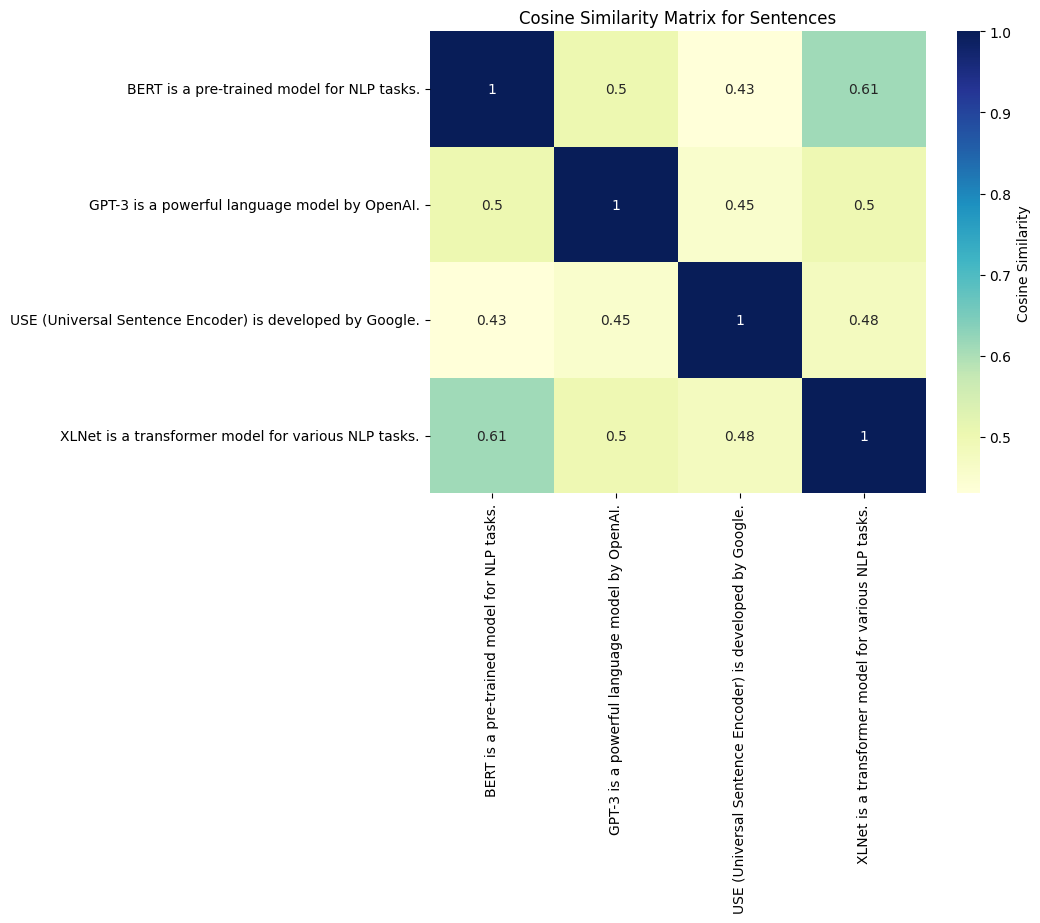

Model Ranking:
   Model  TOPSIS Score  Rank
0   BERT      0.500000   1.5
2    USE      0.500000   1.5
3  XLNet      0.354895   3.0
1  GPT-3      0.268198   4.0
Results:
   Model  Cosine Similarity  Additional Criterion  TOPSIS Score  Rank
0   BERT           0.657473              4.375000      0.500000   1.5
1  GPT-3           0.526070              4.750000      0.268198   4.0
2    USE           0.465368              6.125000      0.500000   1.5
3  XLNet           0.554205              4.777778      0.354895   3.0


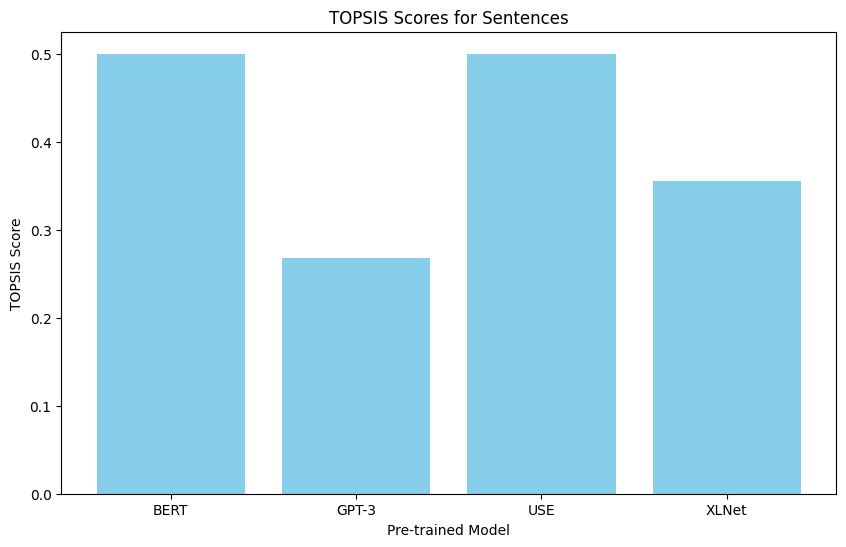


Scores Table:
+-------+-------------------+----------------------+--------------+
| Model | Cosine Similarity | Additional Criterion | TOPSIS Score |
+-------+-------------------+----------------------+--------------+
|  BERT |       0.6575      |        4.3750        |    0.5000    |
| GPT-3 |       0.5261      |        4.7500        |    0.2682    |
|  USE  |       0.4654      |        6.1250        |    0.5000    |
| XLNet |       0.5542      |        4.7778        |    0.3549    |
+-------+-------------------+----------------------+--------------+


In [ ]:
c# Get sentence embeddings
sentence_embeddings = model_3.encode(sentences, convert_to_tensor=True)

# Calculate cosine similarity for each pair of sentences
similarity_matrix = util.pytorch_cos_sim(sentence_embeddings, sentence_embeddings).numpy()

# Create a DataFrame for the similarity matrix
df_similarity_matrix = pd.DataFrame(similarity_matrix, columns=sentences, index=sentences)

# Display the similarity matrix table
print("Similarity Matrix:")
print(df_similarity_matrix)

# Draw a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(df_similarity_matrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Cosine Similarity'})
plt.title('Cosine Similarity Matrix for Sentences')
plt.show()

# Get sentence embeddings
reference_embedding = model_3.encode([reference_sentence], convert_to_tensor=True)

# Calculate cosine similarity for each sentence with the reference sentence
cosine_similarity_scores = [util.pytorch_cos_sim(reference_embedding, sentence_embedding)[0][0].item() for sentence_embedding in sentence_embeddings]

#Additional criterion (length of sentences)
additional_criterion_scores = [np.mean([len(word) for word in sentence.split()]) for sentence in sentences]


# Create a DataFrame with the scores
data = {'Model': ['BERT', 'GPT-3', 'USE', 'XLNet'],
        'Cosine Similarity': cosine_similarity_scores,
        'Additional Criterion': additional_criterion_scores}

df_scores = pd.DataFrame(data)

# Normalize the scores using Min-Max scaling
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(df_scores.iloc[:, 1:])

# Define weights for each criterion
weights = [0.5, 0.5]  # Adjust weights based on importance

# Calculate weighted normalized scores for each criterion
weighted_normalized_scores = normalized_scores * weights

# Calculate positive and negative ideal solutions
positive_ideal_solution = weighted_normalized_scores.max()
negative_ideal_solution = weighted_normalized_scores.min()

# Calculate the separation measures
positive_distance = ((weighted_normalized_scores - positive_ideal_solution) ** 2).sum(axis=1) ** 0.5
negative_distance = ((weighted_normalized_scores - negative_ideal_solution) ** 2).sum(axis=1) ** 0.5

# Calculate the performance score (TOPSIS Score)
performance_score = negative_distance / (negative_distance + positive_distance)

# Add performance score to the DataFrame
df_scores['TOPSIS Score'] = performance_score

df_scores['Rank'] = df_scores['TOPSIS Score'].rank(ascending=False)

# Print the results
print("Model Ranking:")
print(df_scores[['Model', 'TOPSIS Score', 'Rank']].sort_values(by='Rank'))
# Display the results
print("Results:")
print(df_scores)

# Draw a bar chart to visualize the TOPSIS scores
plt.figure(figsize=(10, 6))
plt.bar(df_scores['Model'], df_scores['TOPSIS Score'], color='skyblue')
plt.xlabel('Pre-trained Model')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Scores for Sentences')
plt.show()

# Create a table for better visualization
table_scores_3= PrettyTable()
table_scores_3.field_names = ['Model', 'Cosine Similarity', 'Additional Criterion', 'TOPSIS Score']
for i, row in df_scores.iterrows():
    table_scores_3.add_row([row['Model'], f"{row['Cosine Similarity']:.4f}", f"{row['Additional Criterion']:.4f}", f"{row['TOPSIS Score']:.4f}"])

print("\nScores Table:")
print(table_scores_3)
